In [1]:
#!pip install kaggle

In [2]:
#!kaggle datasets download -d salader/dogs-vs-cats

In [3]:
#!unzip dogs-vs-cats.zip


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='E:/CNN Personal Practise/Dogs vs Cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.


In [6]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'E:/CNN Personal Practise/Dogs vs Cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)    
)

Found 5000 files belonging to 2 classes.


In [7]:
def normalise(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(normalise)
validation_ds = validation_ds.map(normalise)

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=6, validation_data=validation_ds)

Epoch 1/6
625/625 [==============================] - 423s 675ms/step - loss: 0.6312 - accuracy: 0.6368 - val_loss: 0.5526 - val_accuracy: 0.7286
Epoch 2/6
625/625 [==============================] - 437s 699ms/step - loss: 0.5158 - accuracy: 0.7462 - val_loss: 0.4747 - val_accuracy: 0.7750
Epoch 3/6
625/625 [==============================] - 420s 671ms/step - loss: 0.4262 - accuracy: 0.8011 - val_loss: 0.4738 - val_accuracy: 0.7776
Epoch 4/6
625/625 [==============================] - 421s 674ms/step - loss: 0.2955 - accuracy: 0.8723 - val_loss: 0.5810 - val_accuracy: 0.7734
Epoch 5/6
625/625 [==============================] - 417s 667ms/step - loss: 0.1763 - accuracy: 0.9299 - val_loss: 0.8883 - val_accuracy: 0.7614
Epoch 6/6
625/625 [==============================] - 414s 663ms/step - loss: 0.1051 - accuracy: 0.9640 - val_loss: 0.9956 - val_accuracy: 0.7698


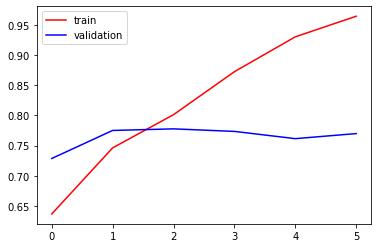

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

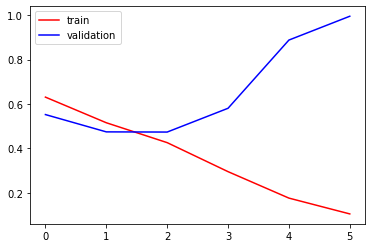

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

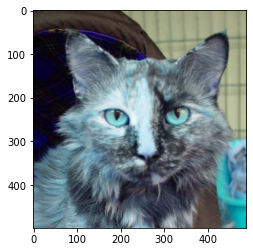

In [52]:
test_img1 = cv2.imread('E:/CNN Personal Practise/Dogs vs Cats/test/cats/cat.10.jpg')
plt.imshow(test_img1)

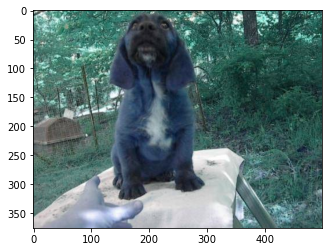

In [45]:
test_img2 = cv2.imread('E:/CNN Personal Practise/Dogs vs Cats/test/dogs/dog.5.jpg')
plt.imshow(test_img2)

In [53]:
test_img1.shape

(499, 489, 3)

In [46]:
test_img2.shape

(376, 499, 3)

In [54]:
test_img1 = cv2.resize(test_img,(256,256))
test_img2 = cv2.resize(test_img,(256,256))

In [55]:
test_input1 = test_img1.reshape((1,256,256,3))
test_input2 = test_img2.reshape((1,256,256,3))

In [56]:
model.predict(test_input1)

1/1 [==============================] - 0s 39ms/step


array([[0.]], dtype=float32)

In [61]:
model.predict(test_input2)

1/1 [==============================] - 0s 24ms/step

array([[1.]], dtype=float32))
